In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Read the image

In [2]:
def reloadImg():
    return cv2.imread('../../data/ex5.jpg')

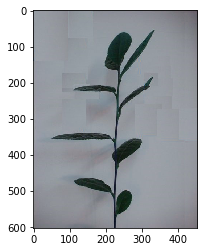

In [3]:
img = reloadImg()

#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(img)
plt.show()

converting to black and white pixel image 

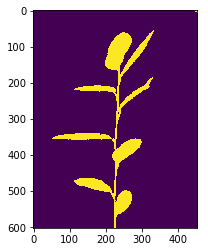

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

cv2.imshow('thresh',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# noise removal
kernel = np.ones((2,2),np.uint8)

# sure background area
sure_bg = cv2.dilate(thresh,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

#cv2.imshow('original',img)
cv2.imshow('thresh',thresh)
#cv2.imshow('sure_bg',sure_bg)
cv2.imshow('dist_transform',dist_transform)
cv2.imshow('sure_fg',sure_fg)
#cv2.imshow('unknown',unknown)

cv2.waitKey(0)
cv2.destroyAllWindows()

isolating leaves

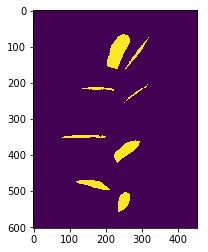

In [6]:
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(sure_fg)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 30
mask_sizes[0] = 0
sure_fg2 = mask_sizes[label_objects]
sure_fg3 = np.uint8(sure_fg2.astype(int))
plt.imshow(sure_fg3)
plt.show()

Using Countours and counting

no of leaves : 8


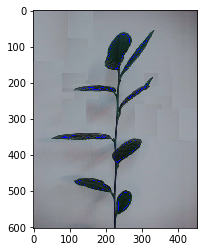

In [8]:
img = reloadImg()

(_1, contours, _2) = cv2.findContours(sure_fg3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0, 0, 255), 1)

print('no of leaves :',len(_2[0]))

plt.imshow(img)
plt.show()

cv2.imshow('contours',img)
cv2.waitKey(0)
cv2.destroyAllWindows()